In [24]:
import pandas as pd
from wordcloud import WordCloud
import matplotlib.pyplot as plt
import nltk
from nltk.probability import FreqDist
from nltk.tokenize import word_tokenize
nltk.download('punkt')


[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\anape\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [25]:
df =  pd.read_csv('annotations.csv',  sep=';;', on_bad_lines='skip',lineterminator='\r', engine ='python')
df.head(10)

,id,tweet,start,end,probability,type,normalized_text
0,65536,6.811854e+17,7.0,16.0,1.0,Other,Fantástico
1,131072,6.964583e+17,64.0,69.0,1.0,Place,França
2,196608,7.602576e+17,21.0,23.0,1.0,Place,Rio
3,327680,8.992992e+17,33.0,38.0,1.0,Place,Iraque
4,393216,9.729045e+17,93.0,101.0,1.0,Place,São Paulo
5,458752,1.037407e+18,17.0,22.0,1.0,Place,Canadá
6,524288,1.094176e+18,89.0,93.0,1.0,Person,Martí
7,589824,1.152424e+18,71.0,76.0,1.0,Organization,México
8,655360,1.207139e+18,100.0,106.0,1.0,Place,Jundiaí
9,131328,6.965539e+17,47.0,54.0,1.0,Place,Porto de


In [27]:
text_column = df['type']

# Tokenize and freq
all_words = []
for text in text_column:
    if isinstance(text, str):  # to fix this: TypeError: expected string or bytes-like object
        words = word_tokenize(text)
        all_words.extend(words)

freq_dist = FreqDist(all_words)

for word, frequency in freq_dist.items():
    print(f'{word}: {frequency}')

Other: 122657
Place: 317348
Person: 158715
Organization: 61405
Product: 130


In [30]:
text_normalized = df['normalized_text']

# Tokenize and freq
all_words = []
for text in text_normalized :
    if isinstance(text, str):  # to fix this: TypeError: expected string or bytes-like object
        words = word_tokenize(text)
        all_words.extend(words)

freq_dist = FreqDist(all_words)

# ordering
sorted_freq = sorted(freq_dist.items(), key=lambda x: x[1], reverse=True)

for word, frequency in sorted_freq:
    print(f'{word}: {frequency}')

Brasil: 32688
EUA: 19665
Trump: 16861
Europa: 14590
Imigrantes: 12631
São: 11374
ONU: 10771
Paulo: 10440
Alemanha: 10199
SP: 8437
Itália: 7623
França: 7007
do: 6930
de: 6870
Síria: 6331
Bolsonaro: 6062
Venezuela: 5406
Turquia: 5187
Grécia: 5135
UE: 4783
Portugal: 4438
Mediterrâneo: 4336
Roraima: 4236
Imigrante: 4093
Rio: 4089
G1: 4053
da: 4021
Merkel: 3978
dos: 3706
Francisco: 3436
ACNUR: 3243
Canadá: 3230
Kaysar: 3218
Anchieta: 3106
Imigração: 3090
Obama: 3003
Paris: 2921
Jesus: 2855
Nova: 2780
México: 2759
Papa: 2738
Temer: 2692
União: 2677
Europeia: 2667
Estados: 2569
Lula: 2445
Unidos: 2341
América: 2323
Líbia: 2195
Copa: 2150
Espanha: 2102
Maduro: 2022
Sul: 1994
Donald: 1966
Macron: 1953
África: 1897
Santos: 1852
Líbano: 1806
Refugiados: 1769
Suécia: 1740
Camila: 1723
Acnur: 1718
Jordânia: 1708
Iraque: 1704
Grecia: 1695
Berlim: 1678
Natal: 1671
Deus: 1656
Londres: 1649
BBB: 1625
Globo: 1570
Hungria: 1528
Twitter: 1452
Facebook: 1438
Cuba: 1433
Jair: 1394
Maria: 1382
twitter: 1373


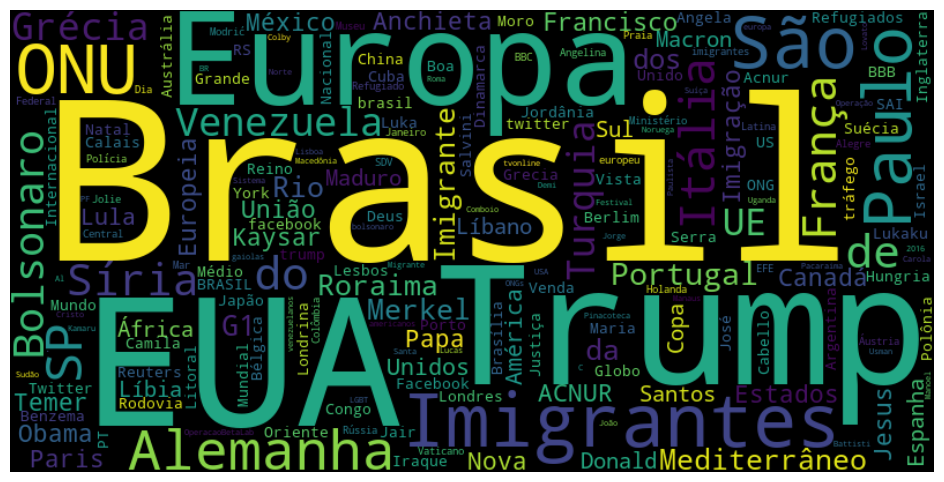

In [29]:
# wordcloud
wordcloud = WordCloud(width=800, height=400, background_color='black').generate_from_frequencies(dict(freq_dist))

plt.figure(figsize=(12, 6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()